In [ ]:
#github
#https://github.com/keon/deep-q-learning/blob/master/ddqn.py

In [3]:
import random
import gym
import numpy as np
from collections import deque
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras import backend as K


In [8]:
class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)
        self.gamma = 0.95    # discount rate
        self.epsilon = 1.0  # exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.999
        self.learning_rate = 0.001
        self.model = self._build_model()
        self.target_model = self._build_model()
        self.update_target_model()

    def _huber_loss(self, target, prediction):
        # sqrt(1+error^2)-1
        error = prediction - target
        return K.mean(K.sqrt(1+K.square(error))-1, axis=-1)

    def _build_model(self):
        # Neural Net for Deep-Q learning Model
        model = Sequential()
        model.add(Dense(24, input_dim=self.state_size, activation='relu'))
        model.add(Dense(24, activation='relu'))
        model.add(Dense(self.action_size, activation='linear'))
        model.compile(loss=self._huber_loss,
                      optimizer=Adam(lr=self.learning_rate))
        return model

    def update_target_model(self):
        # copy weights from model to target_model
        self.target_model.set_weights(self.model.get_weights())

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if agent.epsilon > agent.epsilon_min:
            agent.epsilon *= agent.epsilon_decay
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        act_values = self.model.predict(state)
        return np.argmax(act_values[0])  # returns action

    def replay(self, batch_size):
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = self.model.predict(state)
            if done:
                target[0][action] = reward
            else:
                # a = self.model.predict(next_state)[0]
                t = self.target_model.predict(next_state)[0]
                target[0][action] = reward + self.gamma * np.amax(t)
                # target[0][action] = reward + self.gamma * t[np.argmax(a)]
            self.model.fit(state, target, epochs=1, verbose=0)

    def load(self, name):
        self.model.load_weights(name)

    def save(self, name):
        self.model.save_weights(name)



In [17]:


env = gym.make('CartPole-v1')
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
agent = DQNAgent(state_size, action_size)
# agent.load("./save/cartpole-ddqn.h5")


Exception ignored in: <bound method Viewer.__del__ of <gym.envs.classic_control.rendering.Viewer object at 0x0000011A2ECCFAC8>>
Traceback (most recent call last):
  File "C:\Users\sh2\Anaconda3\lib\site-packages\gym\envs\classic_control\rendering.py", line 143, in __del__
    self.close()
  File "C:\Users\sh2\Anaconda3\lib\site-packages\gym\envs\classic_control\rendering.py", line 62, in close
    self.window.close()
  File "C:\Users\sh2\Anaconda3\lib\site-packages\pyglet\window\win32\__init__.py", line 287, in close
    super(Win32Window, self).close()
  File "C:\Users\sh2\Anaconda3\lib\site-packages\pyglet\window\__init__.py", line 750, in close
    app.windows.remove(self)
  File "C:\Users\sh2\Anaconda3\lib\site-packages\pyglet\app\__init__.py", line 101, in remove
    del self._dict[value]
  File "C:\Users\sh2\Anaconda3\lib\weakref.py", line 391, in __delitem__
    del self.data[ref(key)]
KeyError: (<weakref at 0x0000011A2F103F48; to 'Win32Window' at 0x0000011A2ED23BA8>,)


In [18]:
score_board = []

In [19]:
done = False
batch_size = 32
EPISODES = 100
for e in range(EPISODES):
    state = env.reset()
    state = np.reshape(state, [1, state_size])
    for time in range(10001): #학습이 잘되면 늘려줘도됨.
        #env.render()
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        reward = reward if not done else -10
        next_state = np.reshape(next_state, [1, state_size])
        agent.remember(state, action, reward, next_state, done)
        state = next_state
        if done:
            agent.update_target_model()
            score_board.append(time)
            print("episode: {}/{}, score: {}, e: {:.2}"
                    .format(e, EPISODES, time, agent.epsilon))
            break
        if len(agent.memory) > batch_size:
            agent.replay(batch_size)

episode: 0/100, score: 14, e: 0.86
episode: 1/100, score: 16, e: 0.72
episode: 2/100, score: 23, e: 0.57
episode: 3/100, score: 14, e: 0.49
episode: 4/100, score: 27, e: 0.37
episode: 5/100, score: 17, e: 0.31
episode: 6/100, score: 8, e: 0.28
episode: 7/100, score: 9, e: 0.25
episode: 8/100, score: 59, e: 0.14


KeyboardInterrupt: 

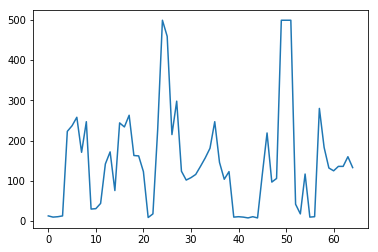

In [14]:
import matplotlib.pyplot as plt
plt.plot(score_board)
plt.show()